# No-show For appointments Data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset shows info for more than 110Kmedical appointments in Brazil. The main aspect of this dataset is to study whether patients show up for their appointments or not, furthermore, finding the factors affecting this aspect.

In [1]:
#importing needed modules
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [2]:
df=pd.read_csv('noshowappointments.csv')

### Assessing Data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.Age.sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

In [8]:
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Quality Issues
1- "ScheduledDay" and "AppointmentDay" columns are strings instead of datetime object.

2- Age column has a value that's less than 0 which is the least possible value and indicates a baby that's less than 1 year old.

3- No possible use for "AppointmentID" column in the analysis.

4- "Yes" and "No" in "No-show" column could cause a consistency issue.

5- The dash in "No-show" column could cause errors. 


### Data Cleaning

In [10]:
# making a copy of the original dataframe first.
df_clean=df.copy()

##### define:
The "ScheduledDay" and "AppointmentDay" columns should be converted to datetime objects instead of strings.

##### code:

In [11]:
df_clean.ScheduledDay=pd.to_datetime(df_clean.ScheduledDay)
df_clean.AppointmentDay=pd.to_datetime(df_clean.ScheduledDay)

##### test:

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

##### define:
The value that's less than 0 in "Age" column should be dropped.

##### code:

In [13]:
df_clean=df_clean.query("Age>=0")

##### test:

In [14]:
df_clean.query("Age<0").value_counts().sum()

0

##### define:
The "AppointmentID" column should be dropped.

##### code:

In [15]:
df_clean.drop("AppointmentID",axis=1,inplace=True)

##### test:

In [16]:
df_clean.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### define:
 "Yes" and "No" in "No-show" column should be replaced with 1 and 0.

##### code:

In [17]:
df_clean["No-show"].replace({"Yes":1,"No":0},inplace=True)

##### test:

In [18]:
df_clean["No-show"].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

##### define:
I will replace the dash in the "No_show" column with an underscore.

##### code:

In [19]:
df_clean.rename(columns={"No-show": "No_show"},inplace=True)

##### test:

In [20]:
df_clean.No_show

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_show, Length: 110526, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Which gender doesn't show up more?

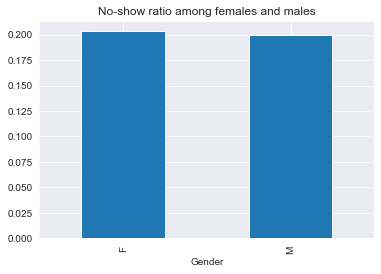

In [21]:
df_clean.groupby('Gender')['No_show'].mean().plot(kind="bar",title="No-show ratio among females and males");

### what is the relation between different ages and showing up? 

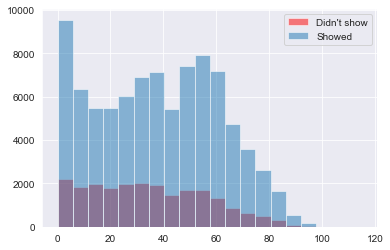

In [22]:
df_yes=df_clean.query('No_show==1')
df_yes['Age'].hist(alpha=0.5,bins=20,label="Didn't show",color="red")
df_no=df_clean.query('No_show==0')
df_no.Age.hist(alpha=0.5,bins=20,label="Showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions
From the bar chart, we can notice that there's a very slight difference between presence numbers among males and females.
The second chart indicates that the younger their age, the more likely they won't show up for the appointment. 